#Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv






In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing data set

In [112]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


this data set contains the detail of all wine and contain only numeric data

Data Cleaning and Checking

In [113]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
#checking the dimention of dataset
df.shape

(1599, 12)

In [115]:
#checking the column of dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [116]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [117]:
#checking the types of column of dataset
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All are float value we have seen

In [118]:
#checking the null value of  column of dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null values we will also check it by using heatmap

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


since there are no object datatypes that must be converted to numerical values

<Axes: >

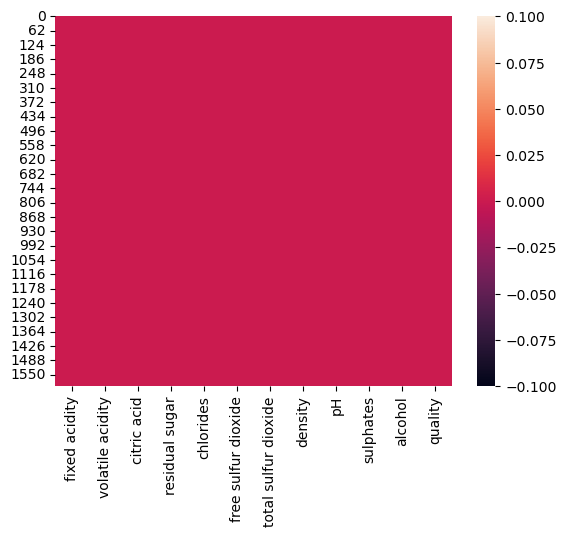

In [120]:
sns.heatmap(df.isnull())

heat map also shows that there no null value present, we find there are no null values and all datatypes seem to be right 

In [121]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [122]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [123]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

These are the value counts of all columns and we have seen there is no white space are present

In [124]:
#checking the list of counts of target
df["quality"].unique()
    

array([5, 6, 7, 4, 8, 3], dtype=int64)

These are six categories present in target

In [125]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

These are six different categories present in target eight is best quality out of all wine

In [126]:
#checking the categorical& numericavalue of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

        

Categorical columns: []


Numerical columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


There are no categorial data present all are numerical column

# Description of data set

In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This gives the all statical information of the numerical columns.There is no negative or 
invalid value is present hence we can say that it is perfect
we can obserbe these points:
1.The counts of all columns are same it means there is no missing value in any column
2.The mean value is greater than median(50%) in fixed acidity,free sulfur dioxide and total sulfur dioxide 
columns which means the data is skewed to right in  these columns
3.There no any columns in which mean value is less than median(50%) hence there no right skewed
4.There is major difference beteen 75% and max in free sulfur dioxide and total sulfur dioxide it means the
outliers are present in both columns
5.In this discription min,std and 25% ditail also found

# Data visualization

univariate analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


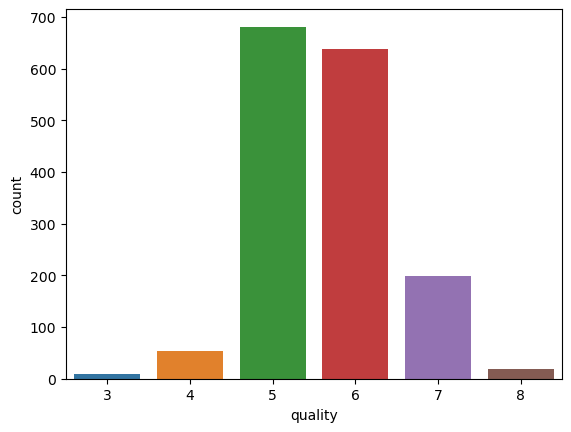

In [128]:
#visualizing the no of quality wine
ax=sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

We observed that the count of 5,6 level qality are high compared to 3,4,7,8 it means different quality values and how many wines have that rating in our dataset,The number of ratings for wine quality '5' and '6' are more than 10 times of that of '3' , '4' and '8'. If we leave it as it is, it might create some problem for us in predicting the quality of the wine. then, we can  undersample the category '5' and '6' and oversample the remaining ones

In [129]:
#Check correlation

In [130]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<Axes: >

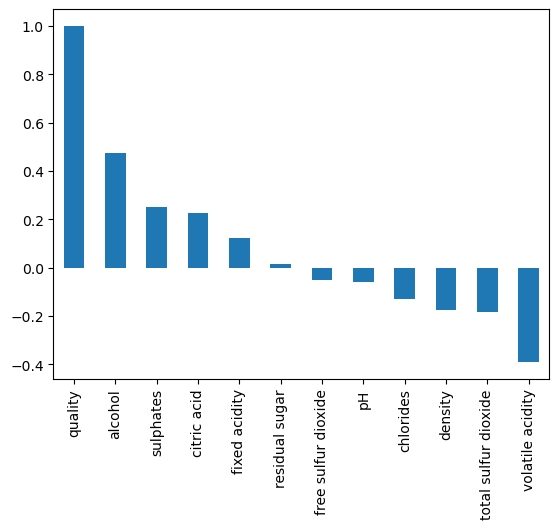

In [131]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as residual sugar,free sulfur dioxide and pH
are less correlated this barplot show value between +4.5 to -4.5

<Axes: >

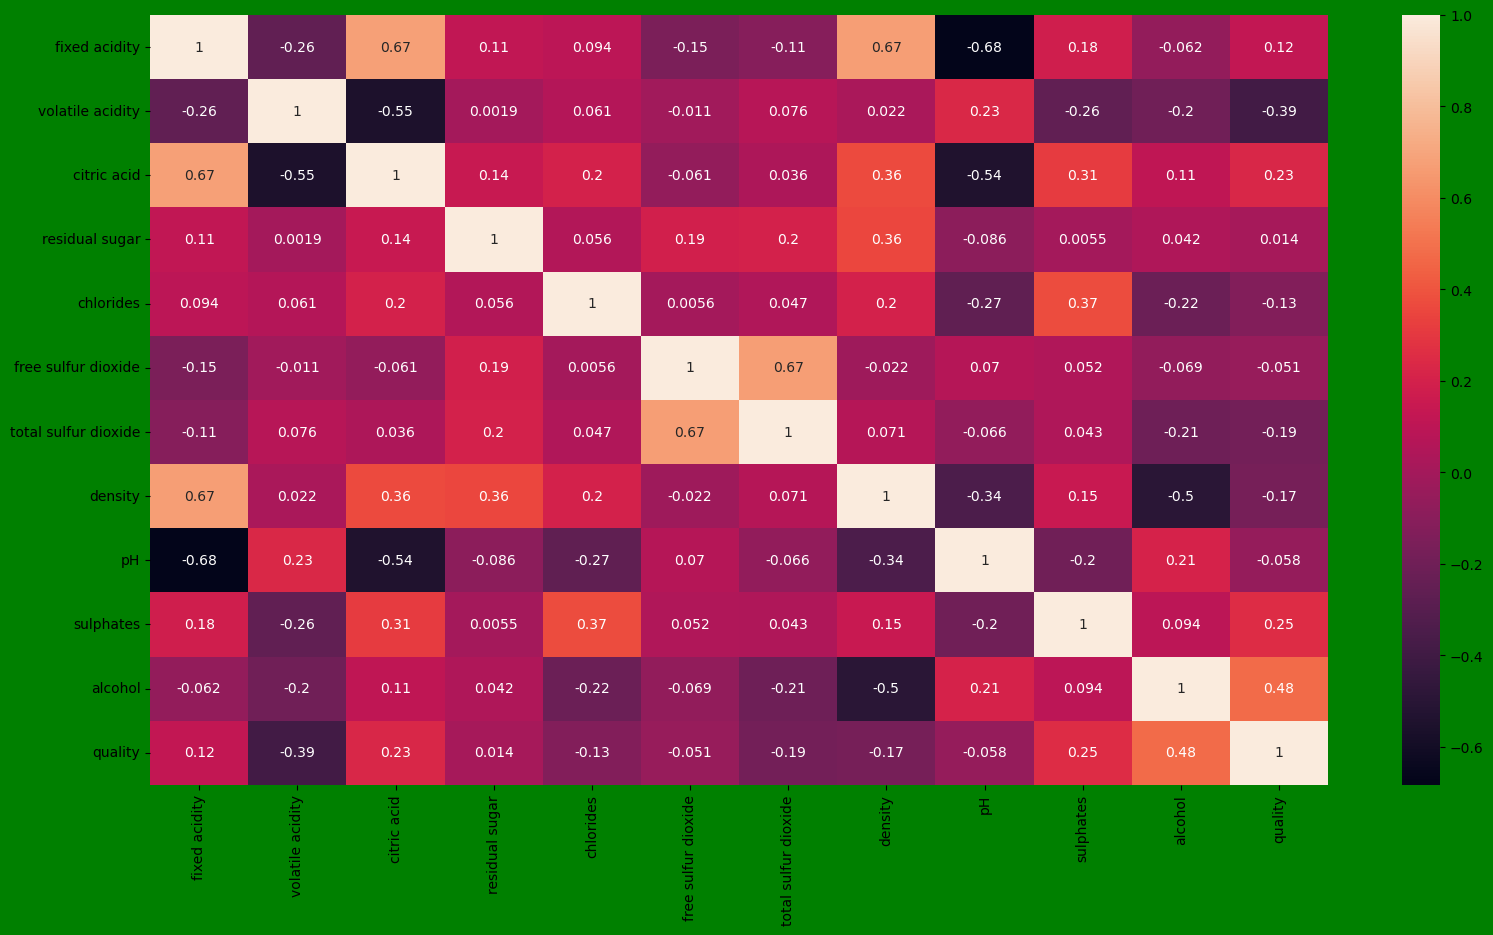

In [132]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some obvious feature correlations such as pH and acidity. Apart from that, we get to
know the percentage of the correlations we obtained before.We can also observe that approximately half of these features 
correlate positively with quality while the other half correlate negatively.From all these features, we are going to 
select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to
stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into 
account features whose values might be redundant and not provide information at all.

In [133]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


From all the values, we are selecting alcohol, sulphates, citric_acid and volatile_acidity in order to study them 
better and see the distribution of values that separate the different qualities.

The above image reveals that how that data is easily distributed on features.

# Alcohol Percent

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

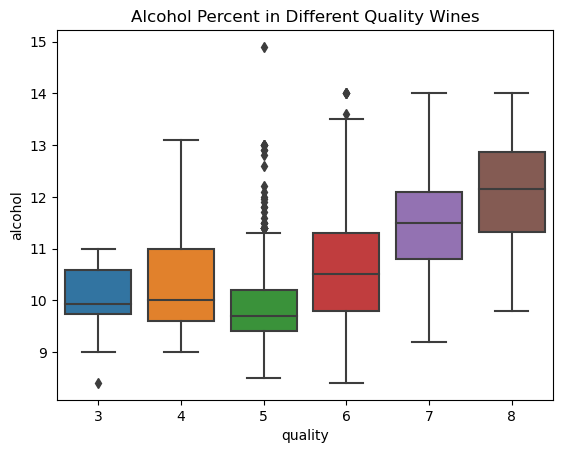

In [134]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

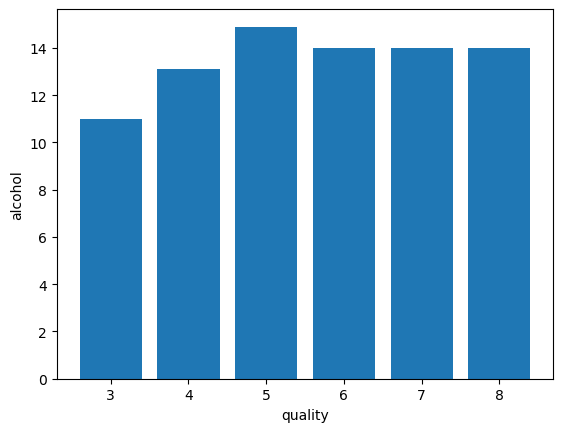

In [135]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

On this barplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with 
rating 5 or 6 are presenting some strange values. Let's do some further investigation now:
In order to see why we do have these different values, we are going to select a subset of the dataset which will only contain
rows whose quality column value is 5 or 6, and we will calculate correlation coefficients for this subset.

In [136]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [137]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric acid             0.080146
fixed acidity           0.053447
pH                      0.043065
residual sugar         -0.018452
free sulfur dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile acidity       -0.237193
total sulfur dioxide   -0.239067
Name: quality, dtype: float64


After calculating the correlations for wines with quality of 5 and 6 we find, that features that correlate the 
most with quality are the same as we obtained before. However, the difference of values shown on the boxplot can
be explained due to having (although the highest) a poor correlation with quality.


# Sulphates and Citric Acid Presence

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

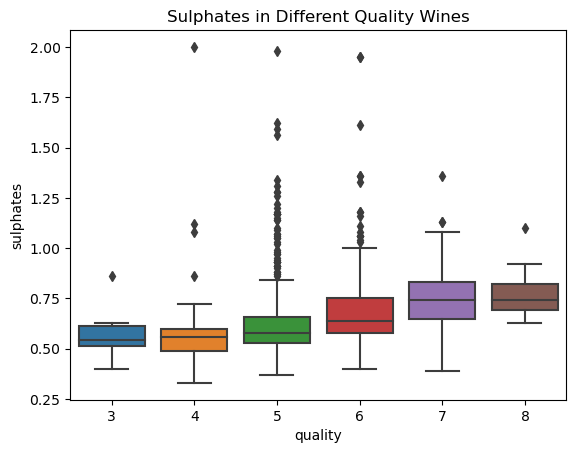

In [138]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

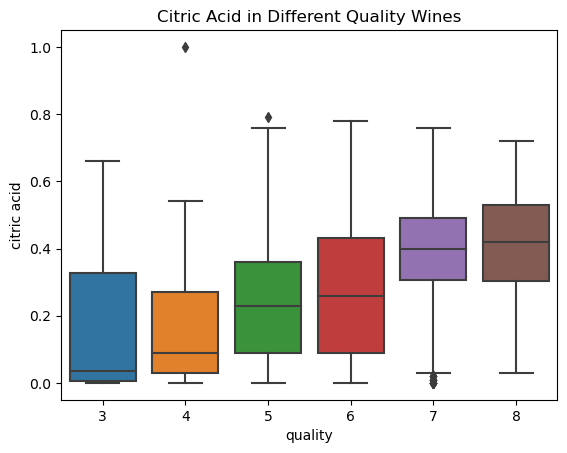

In [139]:
bp = sns.boxplot(x='quality',y='citric acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

from this plot the features "sulphates" and "citric_acid" the relation between them and quality seem to be 
linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of 
sulphates and citric acid to these wines seem to get them higher quality ratings.

# Acetic Acid Presence

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

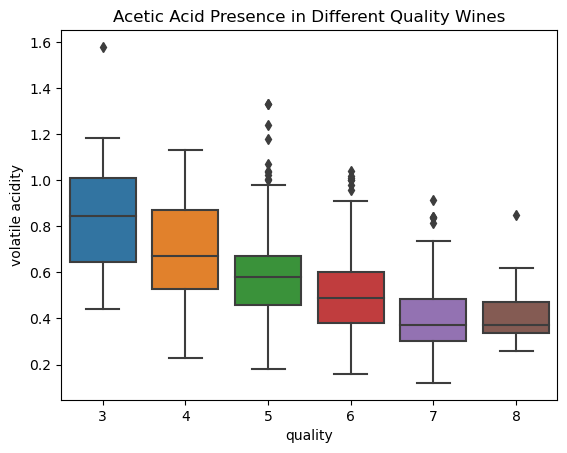

In [140]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

from this plot we can clearly observe how less acetic acid presence in wine seems positive while 
having higher values contribute to having a lower rating

[Text(0.5, 1.0, 'Free sulfur dioxide Presence in Different Quality Wines')]

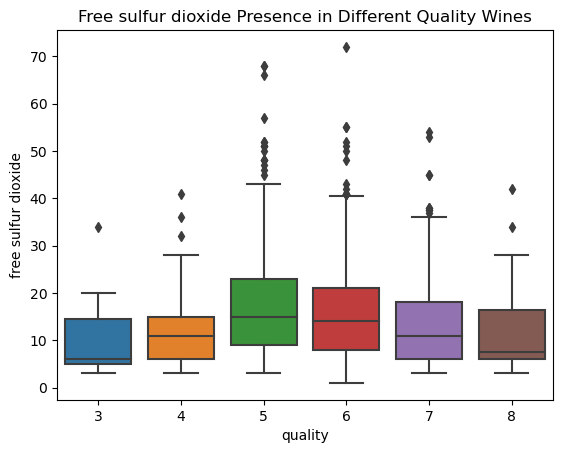

In [141]:
bp = sns.boxplot(x='quality',y='free sulfur dioxide', data=df)
bp.set(title="Free sulfur dioxide Presence in Different Quality Wines")

from this plot we can clearly observe how medium free sulfur dioxide presence in wine seems positive while 
having higher values contribute to having a moderate rating

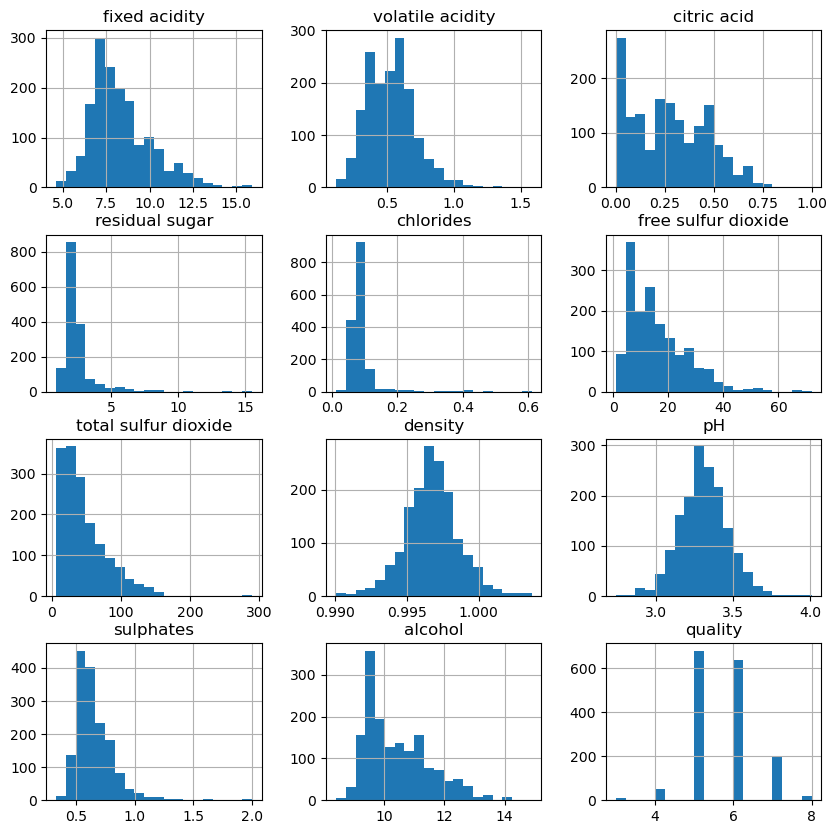

In [142]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

from this plot we can clearly observe about different relation of positive and negative
effect of values contributeAs we can see in the histograms, higher values of alcohol, sulphates
and citric acid seem to belong to higher quality wines while higher values of volatile acity are
present in lower quality wines.

In [143]:
#checking skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#Remove skewness

In [144]:
df['fixed acidity']=np.cbrt(df['fixed acidity'])

In [145]:
df['volatile acidity']=np.cbrt(df['volatile acidity'])

In [146]:
df['residual sugar']=np.cbrt(df['residual sugar'])

In [147]:
df['chlorides']=np.cbrt(df['chlorides'])

In [148]:
df['free sulfur dioxide']=np.cbrt(df['free sulfur dioxide'])

In [149]:
df['sulphates']=np.cbrt(df['sulphates'])

In [150]:
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])

In [151]:
df['alcohol']=np.cbrt(df['alcohol'])

In [152]:
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
dtype: float64

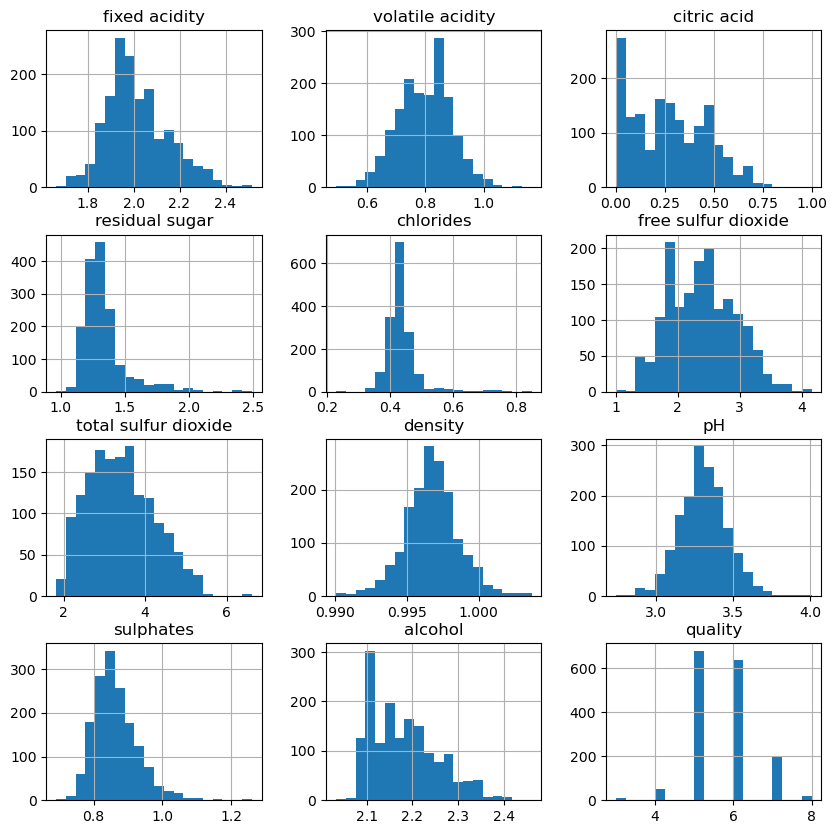

In [153]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

we observe skewness is removed from all class and it seen normal distribution

#  Feature Selection

Now that we have already studied our dataset through histograms and different graphics it's time to select some features we will use in our machine learning algorithms. In this specific case, what we are going to do is use the same columns we studied before, since those are the four ones that give us the most information between features and quality.

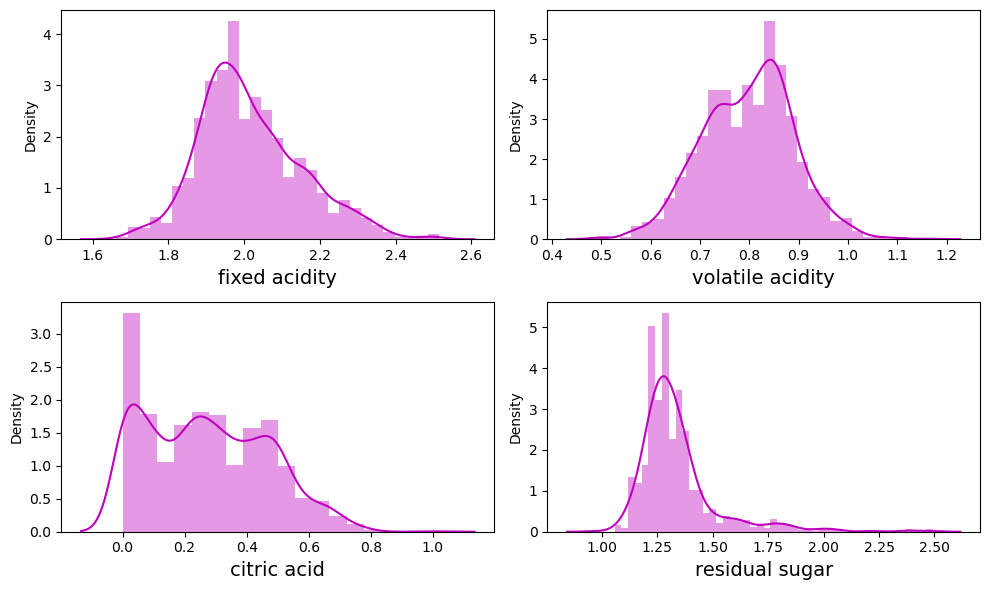

In [154]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

all are normaly distributed

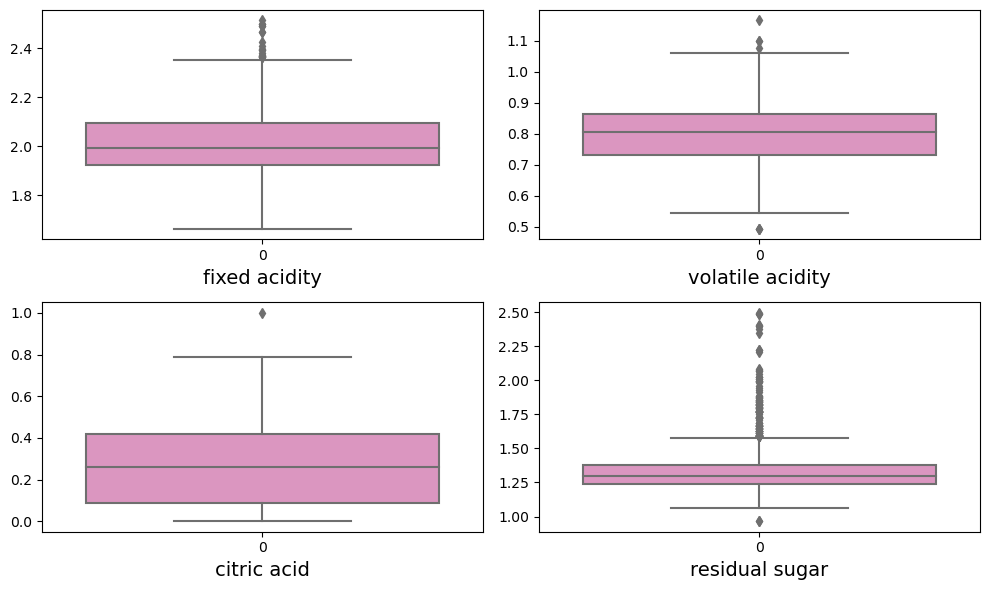

In [155]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

# visualising correlation with target to other value

In [156]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476928
sulphates               0.292537
citric acid             0.226373
fixed acidity           0.118123
residual sugar          0.020657
free sulfur dioxide    -0.051243
pH                     -0.057731
chlorides              -0.161767
density                -0.174919
total sulfur dioxide   -0.180815
volatile acidity       -0.393764
Name: quality, dtype: float64


In [157]:
cor=df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.264748,0.670553,0.154116,0.164063,-0.173739,-0.115392,0.673615,-0.699735,0.196146,-0.082908,0.118123
volatile acidity,-0.264748,1.000000,-0.566698,0.025464,0.106009,0.017797,0.093119,0.037685,0.229324,-0.288941,-0.222070,-0.393764
citric acid,0.670553,-0.566698,1.000000,0.165255,0.192801,-0.080850,0.009224,0.364947,-0.541904,0.327678,0.109388,0.226373
residual sugar,0.154116,0.025464,0.165255,1.000000,0.093468,0.119639,0.171429,0.401010,-0.091009,0.017832,0.070057,0.020657
chlorides,0.164063,0.106009,0.192801,0.093468,1.000000,-0.007952,0.068634,0.303230,-0.282776,0.287061,-0.281050,-0.161767
free sulfur dioxide,-0.173739,0.017797,-0.080850,0.119639,-0.007952,1.000000,0.757872,-0.036124,0.089701,0.054612,-0.079680,-0.051243
total sulfur dioxide,-0.115392,0.093119,0.009224,0.171429,0.068634,0.757872,1.000000,0.095461,-0.031335,0.044914,-0.232059,-0.180815
density,0.673615,0.037685,0.364947,0.401010,0.303230,-0.036124,0.095461,1.000000,-0.341699,0.161109,-0.492844,-0.174919
pH,-0.699735,0.229324,-0.541904,-0.091009,-0.282776,0.089701,-0.031335,-0.341699,1.000000,-0.168561,0.206050,-0.057731
sulphates,0.196146,-0.288941,0.327678,0.017832,0.287061,0.054612,0.044914,0.161109,-0.168561,1.000000,0.123558,0.292537


this shows corellation between target and other values

<Axes: >

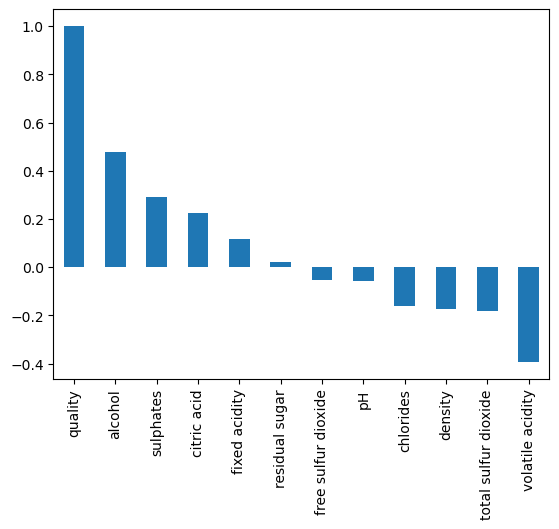

In [158]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as residual sugar,free sulfur dioxide and
pH are less correlated this barplot show value between +4.5 to -4.5

<Axes: >

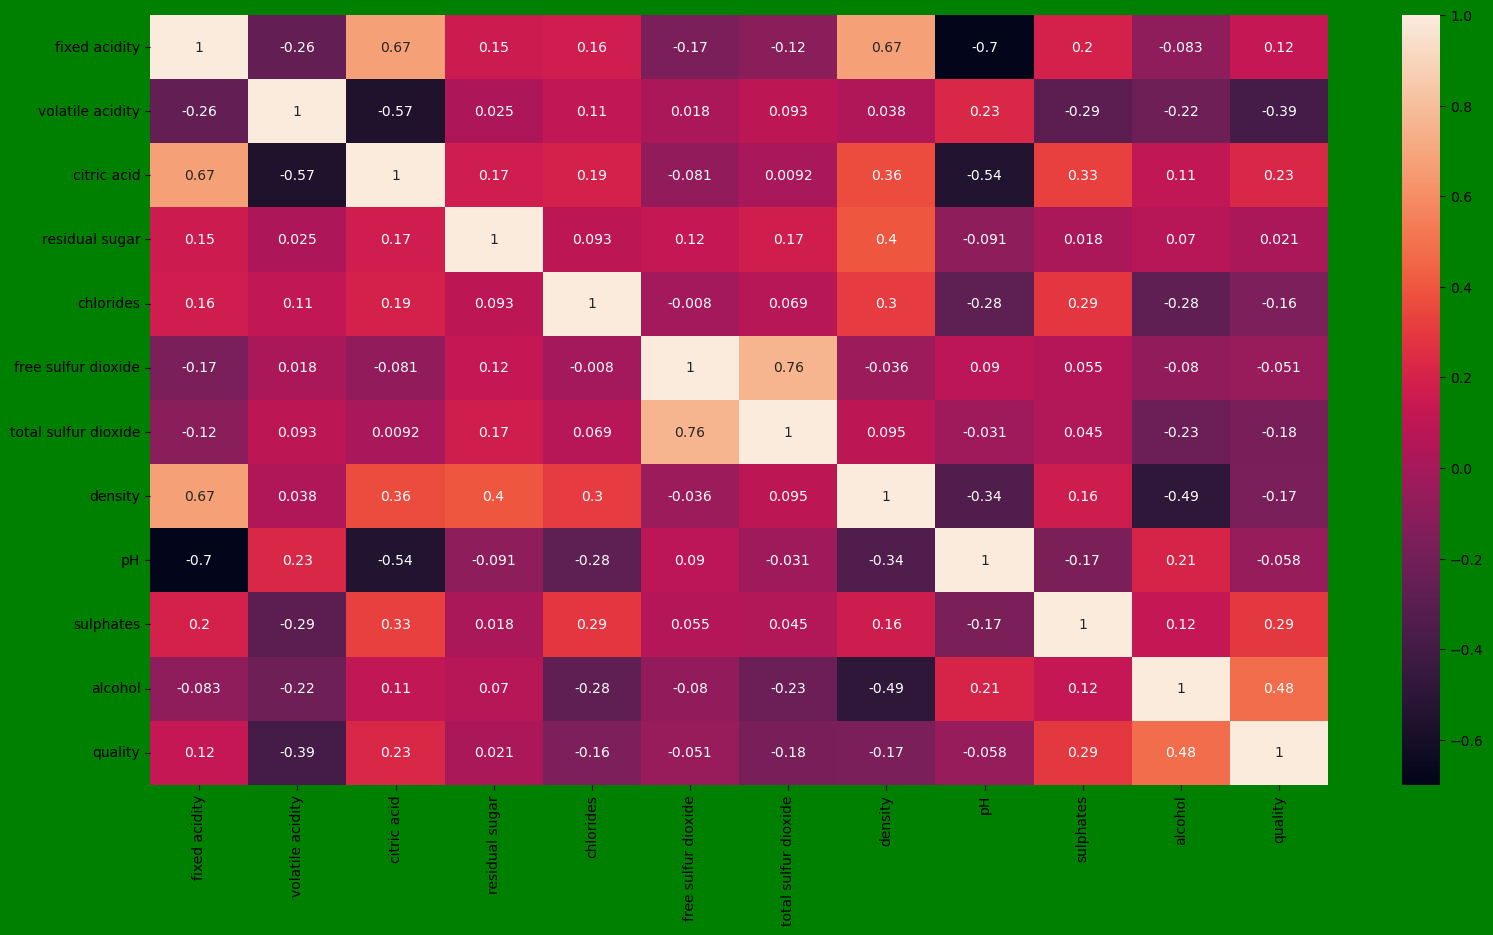

In [159]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

this heatmap shows the correlation between feature to feature and to target
1.there much correlation between target and features
2.citric acid,chloride is correlated to sulphate we will drop is if necessory

In [160]:
cor['quality'].sort_values(ascending = False)


quality                 1.000000
alcohol                 0.476928
sulphates               0.292537
citric acid             0.226373
fixed acidity           0.118123
residual sugar          0.020657
free sulfur dioxide    -0.051243
pH                     -0.057731
chlorides              -0.161767
density                -0.174919
total sulfur dioxide   -0.180815
volatile acidity       -0.393764
Name: quality, dtype: float64

# Separating feature and target

In [161]:
x=df.drop("quality", axis= 1)
y=df["quality"]

# Feature Scaling using Standard Scalarization

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.502833,0.980285,-1.391472,-0.552402,-0.242092,-0.323303,-0.217554,0.558274,1.288643,-0.601783,-0.983467
1,-0.249061,1.745223,-1.391472,0.207150,0.455439,0.983836,0.813317,0.028261,-0.719933,0.221852,-0.577411
2,-0.249061,1.248486,-1.186070,-0.099231,0.276540,0.129002,0.459903,0.134264,-0.331177,0.025664,-0.577411
3,1.620799,-1.559625,1.484154,-0.552402,-0.276838,0.325192,0.629351,0.664277,-0.979104,-0.456840,-0.577411
4,-0.502833,0.980285,-1.391472,-0.552402,-0.242092,-0.323303,-0.217554,0.558274,1.288643,-0.601783,-0.983467
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.323829,0.496940,-0.980669,-0.433557,0.215182,1.452110,0.147087,-0.978765,0.899886,-0.456840,0.107374
1595,-1.545413,0.234881,-0.877968,-0.207258,-0.759603,1.856199,0.370437,-0.862162,1.353436,0.718264,0.762362
1596,-1.251559,0.013548,-0.723916,-0.099231,-0.242092,1.260746,0.008628,-0.533554,0.705508,0.658180,0.578076
1597,-1.545413,0.720613,-0.775267,-0.433557,-0.276838,1.452110,0.147087,-0.676657,1.677400,0.412352,-0.182260


we scale the data to overcome biasness

# checking variance inflation Factor(vif)

In [163]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,8.258480,fixed acidity
1,1.871827,volatile acidity
2,3.096028,citric acid
3,1.907233,residual sugar
4,1.442266,chlorides
5,2.587490,free sulfur dioxide
6,2.867303,total sulfur dioxide
7,7.319135,density
8,3.538390,pH
9,1.413570,sulphates


we observe by checking vif values the feature causing multicollineraity problem. in no any one have vif is more
than 10 so no need to drop any feature.and there no multicollineraity problem .

In [164]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

here we observe that data is not balanced so due to classification problem we balance it by oversampling method

# oversampling

In [165]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [166]:
y1.value_counts()


5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

we observe that all features are balanced

# MODELLING

Finding the best random state

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [168]:

maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 142)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS)    


Best accuracy is = 0.8621533442088092 at random_state  quality


we observe the best accuracy is 87.6% at random_state 81

# creat train test split

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 142)

# classification algorithms

In [170]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [171]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))


0.8694942903752039
[[210   0   0   0   0   0]
 [  0 185   8   2   0   0]
 [  5  14 145  41   4   1]
 [  0   7  25 129  36   6]
 [  0   1   2   8 175   0]
 [  0   0   0   0   0 222]]
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       210
           4       0.89      0.95      0.92       195
           5       0.81      0.69      0.74       210
           6       0.72      0.64      0.67       203
           7       0.81      0.94      0.87       186
           8       0.97      1.00      0.98       222

    accuracy                           0.87      1226
   macro avg       0.86      0.87      0.86      1226
weighted avg       0.87      0.87      0.87      1226



we observe that RandomForestClassifier accuracy 88%

# LogisticRegression

In [172]:
# checking accuracy for LogisticRegression
LR = RandomForestClassifier()
LR.fit(x_train, y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR))

0.8694942903752039
[[210   0   0   0   0   0]
 [  1 185   8   1   0   0]
 [  6  11 142  46   4   1]
 [  0   9  20 131  36   7]
 [  1   0   1   7 177   0]
 [  0   0   0   0   1 221]]
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       210
           4       0.90      0.95      0.92       195
           5       0.83      0.68      0.75       210
           6       0.71      0.65      0.68       203
           7       0.81      0.95      0.88       186
           8       0.97      1.00      0.98       222

    accuracy                           0.87      1226
   macro avg       0.86      0.87      0.86      1226
weighted avg       0.87      0.87      0.87      1226



we observe that LogisticRegression acuracy 89%

# support vector classifier

In [173]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc)) 
print(confusion_matrix(y_test, predsvc)) 
print(classification_report(y_test, predsvc))

0.7724306688417618
[[210   0   0   0   0   0]
 [  4 167  18   6   0   0]
 [ 12  31 118  40   7   2]
 [  3  13  43  84  42  18]
 [  1   0   4  23 146  12]
 [  0   0   0   0   0 222]]
              precision    recall  f1-score   support

           3       0.91      1.00      0.95       210
           4       0.79      0.86      0.82       195
           5       0.64      0.56      0.60       210
           6       0.55      0.41      0.47       203
           7       0.75      0.78      0.77       186
           8       0.87      1.00      0.93       222

    accuracy                           0.77      1226
   macro avg       0.75      0.77      0.76      1226
weighted avg       0.76      0.77      0.76      1226



we observe that support vector classifier accuracy is 78%

# GradientBoostingClassifier

In [177]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB= GB.predict(x_test)
print(accuracy_score(y_test, predGB)) 
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8230016313213703
[[208   1   1   0   0   0]
 [  2 169  16   6   2   0]
 [  4  23 136  40   7   0]
 [  2  10  30 112  42   7]
 [  1   1   4  13 164   3]
 [  0   0   0   0   2 220]]
              precision    recall  f1-score   support

           3       0.96      0.99      0.97       210
           4       0.83      0.87      0.85       195
           5       0.73      0.65      0.69       210
           6       0.65      0.55      0.60       203
           7       0.76      0.88      0.81       186
           8       0.96      0.99      0.97       222

    accuracy                           0.82      1226
   macro avg       0.81      0.82      0.82      1226
weighted avg       0.82      0.82      0.82      1226



we observe that GradientBoostingClassifier accuracy 79%

# BaggingClassifier

In [178]:
# checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC= BC.predict(x_test)
print(accuracy_score(y_test, predBC)) 
print(confusion_matrix(y_test, predBC)) 
print(classification_report(y_test, predBC))

0.8384991843393148
[[209   0   0   1   0   0]
 [  0 179  10   5   1   0]
 [  6  26 138  36   3   1]
 [  2  11  27 121  34   8]
 [  0   1   3  16 166   0]
 [  0   0   0   2   5 215]]
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       210
           4       0.82      0.92      0.87       195
           5       0.78      0.66      0.71       210
           6       0.67      0.60      0.63       203
           7       0.79      0.89      0.84       186
           8       0.96      0.97      0.96       222

    accuracy                           0.84      1226
   macro avg       0.83      0.84      0.83      1226
weighted avg       0.83      0.84      0.83      1226



we observe that BaggingClassifier accuracy 85%

# ExtraTreeClassifier

In [179]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_train, y_train)
predET= ET.predict(x_test)
print(accuracy_score(y_test, predET)) 
print(confusion_matrix(y_test, predET)) 
print(classification_report(y_test, predET))

0.767536704730832
[[198   3   5   4   0   0]
 [  1 165   9  14   5   1]
 [  8  22 111  48  17   4]
 [  6  16  31 104  38   8]
 [  0   3   9  18 153   3]
 [  0   0   2   4   6 210]]
              precision    recall  f1-score   support

           3       0.93      0.94      0.94       210
           4       0.79      0.85      0.82       195
           5       0.66      0.53      0.59       210
           6       0.54      0.51      0.53       203
           7       0.70      0.82      0.76       186
           8       0.93      0.95      0.94       222

    accuracy                           0.77      1226
   macro avg       0.76      0.77      0.76      1226
weighted avg       0.76      0.77      0.76      1226



we observe that ExtraTreeClassifier accuracy 79%

# Cross Validation Score

In [180]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv=5--- it's a fold value 1,2,3,4,5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafult scoring parameter is - r2 score

In [182]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predRFC) - score.mean())

[0.528125   0.534375   0.621875   0.575      0.57053292]
0.5659815830721003
Difference between Accuracy score and cross validation score is - 0.30351270730310353


In [183]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predLR) - score.mean())

[0.515625   0.553125   0.60625    0.565625   0.56426332]
0.5609776645768025
Difference between Accuracy score and cross validation score is - 0.30851662579840133


In [184]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predsvc) - score.mean())

[0.55625   0.54375   0.634375  0.596875  0.5862069]
0.5834913793103448
Difference between Accuracy score and cross validation score is - 0.18893928953141703


In [188]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predGB) - score.mean())

[0.55625   0.55625   0.578125  0.56875   0.5799373]
0.567862460815047
Difference between Accuracy score and cross validation score is - 0.2551391705063233


In [186]:
# checking cv score for BaggingClassifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predBC) - score.mean())

[0.528125   0.51875    0.51875    0.5625     0.55485893]
0.5365967868338558
Difference between Accuracy score and cross validation score is - 0.301902397505459


In [187]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_test, predET) - score.mean())

[0.478125   0.45       0.4125     0.471875   0.42946708]
0.44839341692789975
Difference between Accuracy score and cross validation score is - 0.3191432878029323


Support Vector Classifier is our best model as the difference between accuracy score and cross validation 
score is - 0.23787893064071552 and this is least out of all

finaly we observe that Support Vector Classifier is our best model

# Hyper Parameter Tuning

In [206]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

parameters={'kernel':['linear','rbf'],'C':[1,10],'degree':[3,5],'cache_size':[200,400],'max_iter':[-1,-2]}

In [207]:
GCV=GridSearchCV(SVC(),parameters, cv =5)

In [208]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'cache_size': [200, 400],
                         'degree': [3, 5], 'kernel': ['linear', 'rbf'],
                         'max_iter': [-1, -2]})

In [209]:
GCV.best_params_

{'C': 10, 'cache_size': 200, 'degree': 3, 'kernel': 'rbf', 'max_iter': -1}

In [210]:
Final_model = SVC(C =  10, cache_size = 200, degree = 3, kernel = 'rbf', max_iter = -1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

84.66557911908646


# Plotting ROC compare auc for all the models used

In [221]:
#Plotting ROC compare auc for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score



Plotting ROC compare auc for best model

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

# Saving the model

In [224]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Red_Wine_Quality_Prediction_Project_Analysis.pkl")

['Red_Wine_Quality_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [226]:
# first we load the saved model and get prediction
model = joblib.load("Red_Wine_Quality_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([3, 8, 4, ..., 8, 6, 3], dtype=int64)

# these are the prediction for quality of wine

In [228]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,3,3
1,8,8
2,4,4
3,4,4
4,8,8
...,...,...
1221,7,7
1222,6,6
1223,8,8
1224,6,6
